## Code Submitted by: Chirag Verma

#### To plot:
#### i. Mean square displacement of a 1D random walk as a function of time
####              ii. Histogram of positions of many random walkers afeter a fixed time 

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining some variables

# Starting and ending time of observations
tStart = 0
tEnd = 1000

# Time taken for each step
delT = 1

# Time domain
t = range(tStart, tEnd + delT, delT)

# Number of steps
nStep = int((tEnd - tStart)/delT)

# Length of a step
lStep = 1

# Starting position
posStart = 0

# Ensemble size [10 walkers, 100 walkers, 1000 walkers]
nEnsemble = [1, 10, 50, 100, 1000, 10000]

# Defining the diffusion coeffient
diffCoeff = lStep**2/(2*delT)

# Defining a function that returns the exact relation between time and mean square displacement
def msdExact(t):
    return 2*diffCoeff*t

# Storing the analytical msd values in a list
msdExact_ = []
for time in t:
    msdExact_.append(msdExact(time))

In [3]:
# Every walker out of nEnsemble walkers makes nSteps in time t
steps = []
for i in range(len(nEnsemble)):
    steps.append(lStep*(np.random.randint(2, size = (nEnsemble[i], nStep))*2 - 1))

# # Calculating position of the random walker at different instants of time starting from time instant 1
position = []
for i in range(len(nEnsemble)):
    position.append(np.cumsum(steps[i], axis = 1))

# # But the position of the random walker at time t = 0 is posStart
# # Hence, inserting position = posStart at time = 0
# # And modifying the position at successive time intervals appropriately

for i in range(len(nEnsemble)):
    position[i] = np.insert(position[i], 0, 0, axis=1)
    position[i] += posStart

In [4]:
# For the sake of completeness, calculating the mean of the displacement(/position) for the random walkers

# Calculate the mean of displacement of random walkers at every time instant
# This would return a list of mean displacement at different time instances
# Calculate the mean of this list to get the mean displacement of an arbitrary random walker

positionMean = []

for i in range(len(nEnsemble)):
    positionMean.append(np.mean(np.mean(position[i], axis = 0)))

In [5]:
# Calculating mean square displacement of the random walkers
msd = []
for i in range(len(nEnsemble)):
    temp = (position[i] - posStart)**2
    msd.append(np.mean(temp, axis = 0))

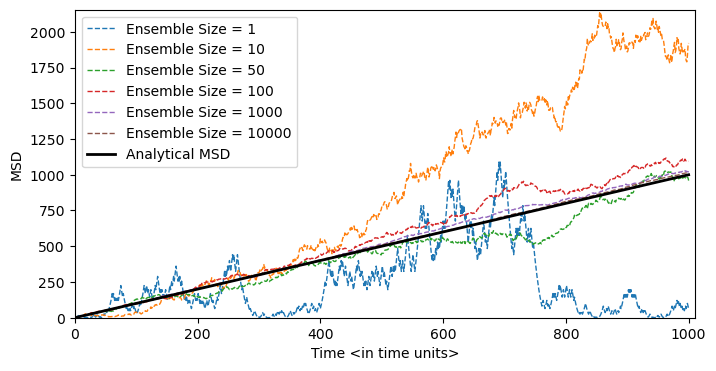

In [6]:
# Plotting everything

fig1, ax1 = plt.subplots(figsize=(8, 4))

for i in range(len(nEnsemble)):
    ax1.plot(t, msd[i], label = "Ensemble Size = %.1d"%nEnsemble[i], lw="1", ls = "--")

ax1.plot(t, msdExact_, label = "Analytical MSD", lw = "2", color = "k" )
ax1.set_xlabel("Time <in time units>")
ax1.set_ylabel("MSD")
ax1.set_xlim(0,1.01*t[-1])
ax1.set_ylim(0, 1.01*np.max(msd))
ax1.legend(loc = "best")


In [7]:
# Plotting a histogram of positions at a specific time

position_reshaped = []
for i in range(len(position)):
    position_reshaped.append(np.reshape(position[i], np.size(position[i])))

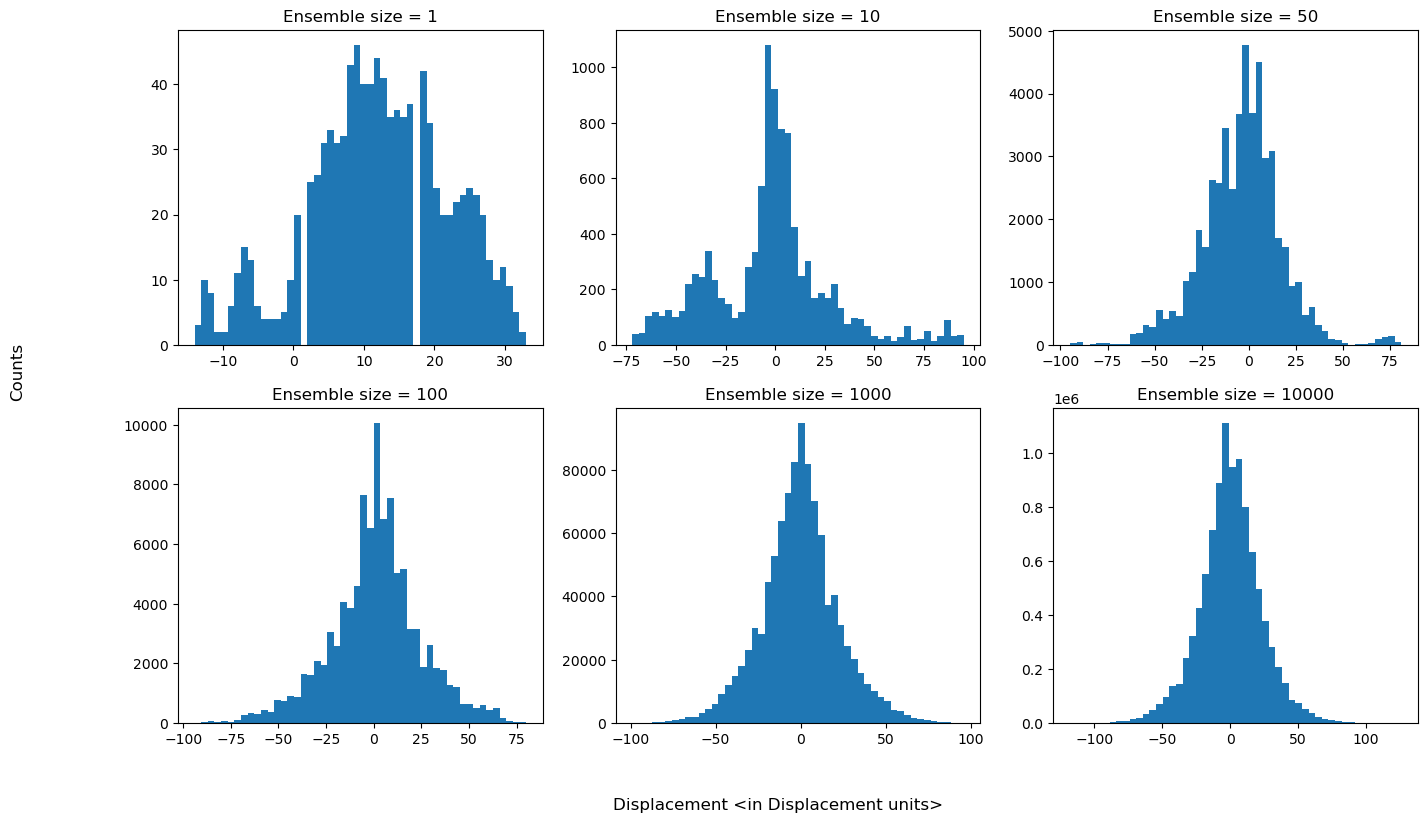

In [8]:
fig2, ax2 = plt.subplots(2, 3, figsize = (16, 9))

for i in range(2):
    for j in range(3):
        
        if i!=1:
            ax2[i][j].hist(position_reshaped[i+j], bins = 50);
            ax2[i][j].set_title("Ensemble size = %.1d"%nEnsemble[i+j])
            
        else:
            ax2[i][j].hist(position_reshaped[i+j+2], bins = 50);
            ax2[i][j].set_title("Ensemble size = %.1d"%nEnsemble[i+j+2])

fig2.supxlabel('Displacement <in Displacement units>');
fig2.supylabel('Counts');
